In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
iris = datasets.load_iris()
data = iris.data 

# data[:4, :]
# iris.feature_names
# iris.target

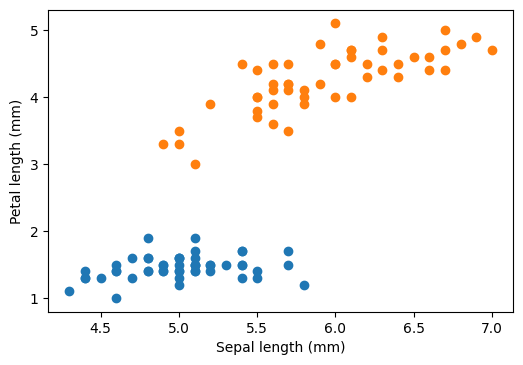

In [3]:
sepal_length = data[:, 0]
petal_length = data[:, 2]

# here we will pick two categories, the dataset has three differnt target values
plt.scatter(sepal_length[iris.target == 0], petal_length[iris.target == 0])
plt.scatter(sepal_length[iris.target == 1], petal_length[iris.target == 1])
plt.xlabel("Sepal length (mm)")
plt.ylabel("Petal length (mm)")
plt.show()

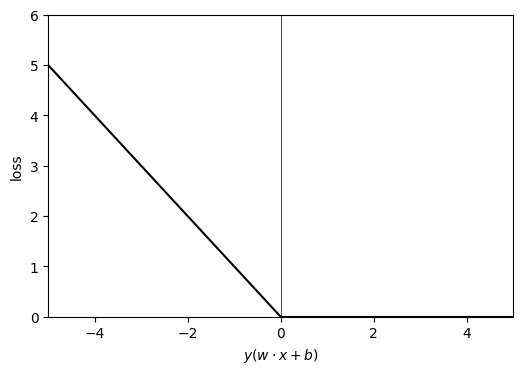

In [4]:
plt.plot([0, 5], [0,0], c="k")
plt.plot([0, -5], [0, 5], c="k")
plt.axvline(lw=0.5, c="k")
plt.xlabel("$y(w \cdot x + b)$")
plt.ylabel("loss")
plt.xlim(-5, 5)
plt.ylim(0, 6)
plt.show()

### Perceptron

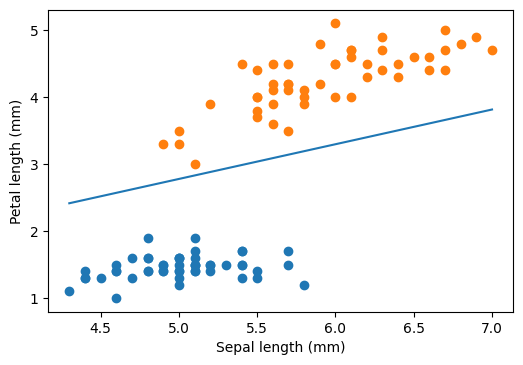

In [5]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=np.random.randint(100))

# choose the data only for category 0 and 1 (i.e., < 2)
data_copy = np.reshape(data[np.tile(np.array([iris.target < 2]).transpose(), (1, 4))], (-1, 4))

# choose only sepal length and petal length cols
X = np.array([data_copy[:, 0], data_copy[:, 2]]).T
y = iris.target[iris.target < 2]

model.fit(X, y)

# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = a * xx - (model.intercept_[0]) / w[1]

plt.scatter(sepal_length[iris.target == 0], petal_length[iris.target == 0])
plt.scatter(sepal_length[iris.target == 1], petal_length[iris.target == 1])
plt.plot(xx, yy)
plt.xlabel("Sepal length (mm)")
plt.ylabel("Petal length (mm)")
plt.show()

### Support Vector Machine

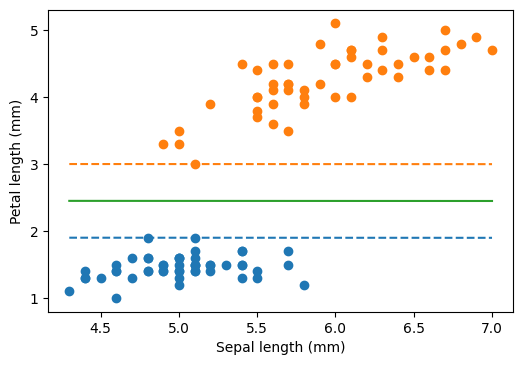

In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1000)
model.fit(X, y)

# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.scatter(sepal_length[iris.target == 0], petal_length[iris.target == 0])
plt.scatter(sepal_length[iris.target == 1], petal_length[iris.target == 1])
plt.plot(xx, yy_down, "--")
plt.plot(xx, yy_up, "--")
plt.plot(xx, yy)
plt.xlabel("Sepal length (mm)")
plt.ylabel("Petal length (mm)")
plt.show()